In [1]:

# Datasource
# Website: https://data.london.gov.uk/dataset/uk-house-price-index


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:

# File location
df = pd.read_csv(r'C:\Users\ddiol\OneDrive\Python\Project\Housing\rent_ads_rightmove_extended.csv')
df.head()




,address,subdistrict_code,rent,deposit,Let type,Furnish Type,Coucil Tax,PROPERTY TYPE,BEDROOMS,BATHROOMS,SIZE,avg_distance_to_nearest_station,nearest_station_count
0,"Morse Close, Harefield, UB9",UB9,1200,1384,Long term,Unfurnished,Ask agent,Apartment,1.0,1.0,Ask agent,2.1,3
1,"Dolphin Square, London, SW1V",SW1V,1983,2288,Long term,"Furnished or unfurnished, landlord is flexible",Ask agent,Apartment,1.0,1.0,335 sq ft,0.4,3
2,"Warlters Road, Holloway, London, N7",N7,1800,0,Long term,Unfurnished,Ask agent,Apartment,1.0,1.0,Ask agent,0.5,3
3,"Rockingham Road, Uxbridge",NaN,1650,1903,Long term,Unfurnished,Ask agent,Apartment,2.0,1.0,Ask agent,1.6,3
4,"Northwick Avenue, Harrow, HA3",HA3,2700,3115,Long term,Unfurnished,Ask agent,End of Terrace,3.0,2.0,Ask agent,0.4,3


In [12]:
# Summary
print(df.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address                          3478 non-null   object 
 1   subdistrict_code                 1868 non-null   object 
 2   rent                             3478 non-null   int64  
 3   deposit                          3478 non-null   int64  
 4   Let type                         3235 non-null   object 
 5   Furnish Type                     3477 non-null   object 
 6   Coucil Tax                       3477 non-null   object 
 7   PROPERTY TYPE                    3438 non-null   object 
 8   BEDROOMS                         2841 non-null   float64
 9   BATHROOMS                        3049 non-null   float64
 10  SIZE                             922 non-null    float64
 11  avg_distance_to_nearest_station  3478 non-null   float64
 12  nearest_station_coun

In [13]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 address                               0
subdistrict_code                   1610
rent                                  0
deposit                               0
Let type                            243
Furnish Type                          1
Coucil Tax                            1
PROPERTY TYPE                        40
BEDROOMS                            637
BATHROOMS                           429
SIZE                               2556
avg_distance_to_nearest_station       0
nearest_station_count                 0
dtype: int64


In [14]:
# Basic statistical summary of numerical columns
summary_stats = df.describe()
print("Statistical summary:\n", summary_stats)

Statistical summary:
                rent       deposit     BEDROOMS    BATHROOMS        SIZE  \
count   3478.000000   3478.000000  2841.000000  3049.000000  922.000000   
mean    2593.092582   1789.097757     1.797958     1.431617  491.353579   
std     2641.117440   2657.305000     0.916597     0.895819  297.092967   
min       50.000000      0.000000     1.000000     1.000000    1.000000   
25%     1550.000000      0.000000     1.000000     1.000000  249.750000   
50%     2275.000000   1038.000000     2.000000     1.000000  534.500000   
75%     3250.000000   2825.000000     2.000000     2.000000  730.750000   
max    78000.000000  60000.000000     7.000000    20.000000  994.000000   

       avg_distance_to_nearest_station  nearest_station_count  
count                      3478.000000            3478.000000  
mean                          0.494940               2.997412  
std                           0.361535               0.050811  
min                           0.100000        

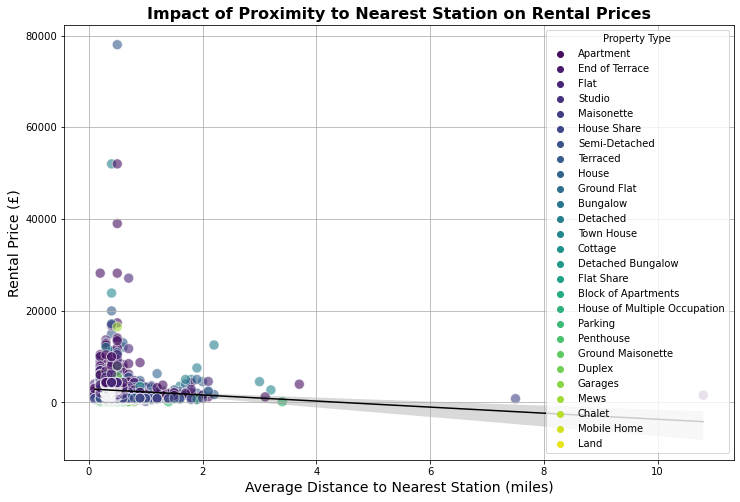

In [17]:


plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='avg_distance_to_nearest_station', y='rent', hue='PROPERTY TYPE', palette='viridis', s=100, edgecolor='w', alpha=0.6)
sns.regplot(data=df, x='avg_distance_to_nearest_station', y='rent', scatter=False, color='black', line_kws={'linewidth':1.5})
plt.title('Impact of Proximity to Nearest Station on Rental Prices', fontsize=16, fontweight='bold')
plt.xlabel('Average Distance to Nearest Station (miles)', fontsize=14)
plt.ylabel('Rental Price (£)', fontsize=14)
plt.grid(True)
plt.legend(title='Property Type')
plt.show()


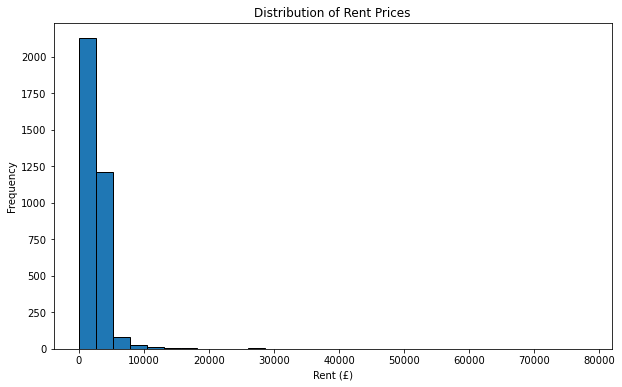

In [15]:
# Distribution Plot: Rent Prices
plt.figure(figsize=(10, 6))
df['rent'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent (£)')
plt.ylabel('Frequency')
plt.show()


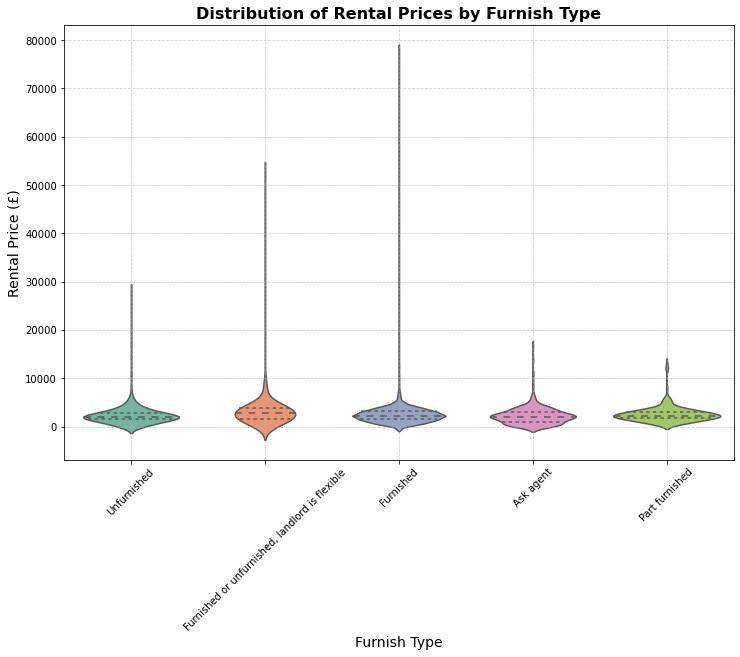

In [16]:
# Distribution of Rental Prices by Furnish Type
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Furnish Type', y='rent', palette='Set2', inner='quartile')
plt.title('Distribution of Rental Prices by Furnish Type', fontsize=16, fontweight='bold')
plt.xlabel('Furnish Type', fontsize=14)
plt.ylabel('Rental Price (£)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

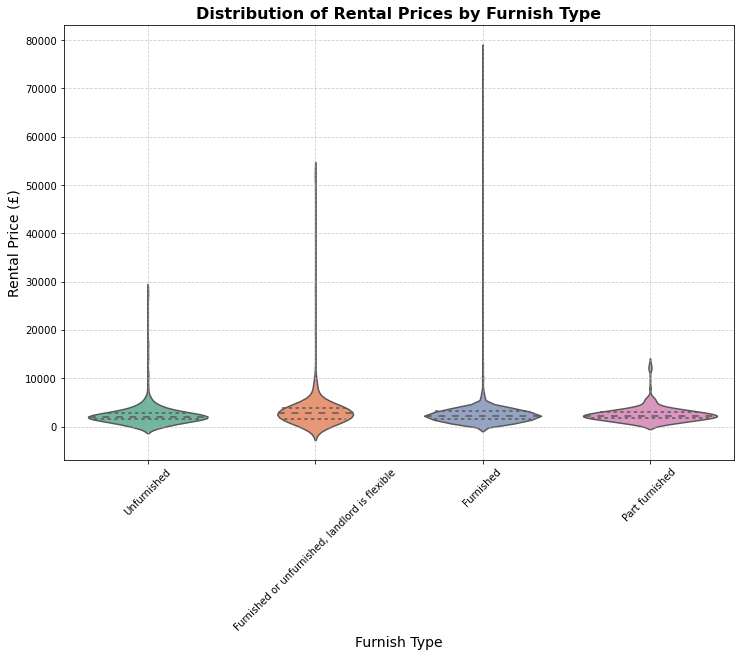

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\ddiol\OneDrive\Python\Project\Housing\rent_ads_rightmove_extended.csv'
df = pd.read_csv(file_path)

# Remove "Ask agent" category from the 'Furnish Type' column
df_filtered = df[df['Furnish Type'] != 'Ask agent']

# Distribution of Rental Prices by Furnish Type
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_filtered, x='Furnish Type', y='rent', palette='Set2', inner='quartile')
plt.title('Distribution of Rental Prices by Furnish Type', fontsize=16, fontweight='bold')
plt.xlabel('Furnish Type', fontsize=14)
plt.ylabel('Rental Price (£)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [22]:
# Data Processing
df['SIZE'] = df['SIZE'].str.extract('(\d+)').astype(float)
df['BEDROOMS'] = df['BEDROOMS'].astype(float)
df['BATHROOMS'] = df['BATHROOMS'].astype(float)
df.rename(columns={'Coucil Tax': 'Council Tax'}, inplace=True)
df_filtered = df[df['Council Tax'] != 'Ask agent']

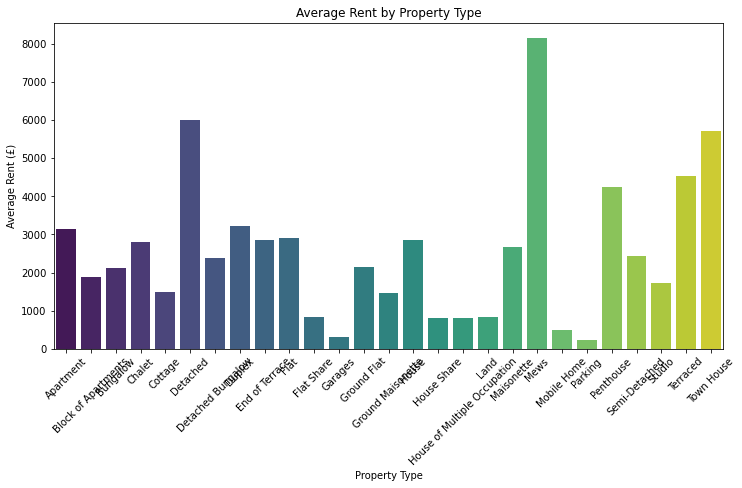

In [25]:
# Bar Plot - Average rent by property type
plt.figure(figsize=(12, 6))
avg_rent_by_property_type = df.groupby('PROPERTY TYPE')['rent'].mean().reset_index()
sns.barplot(data=avg_rent_by_property_type, x='PROPERTY TYPE', y='rent', palette='viridis')
plt.title('Average Rent by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Rent (£)')
plt.xticks(rotation=45)
plt.show()

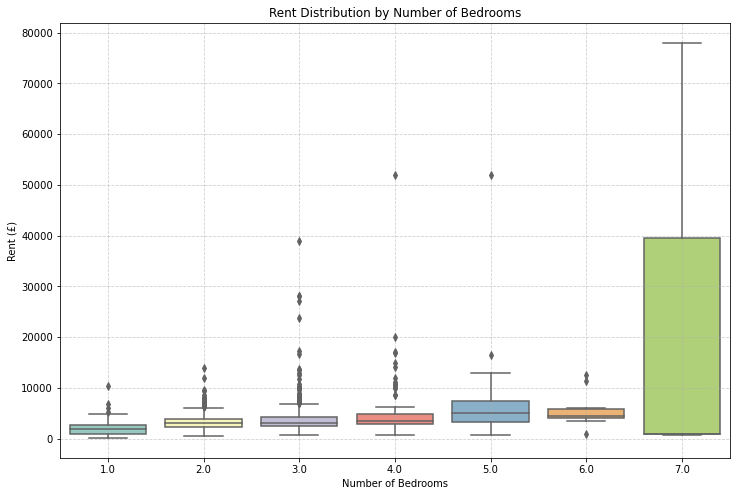

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='BEDROOMS', y='rent', palette='Set3')
plt.title('Rent Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (£)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


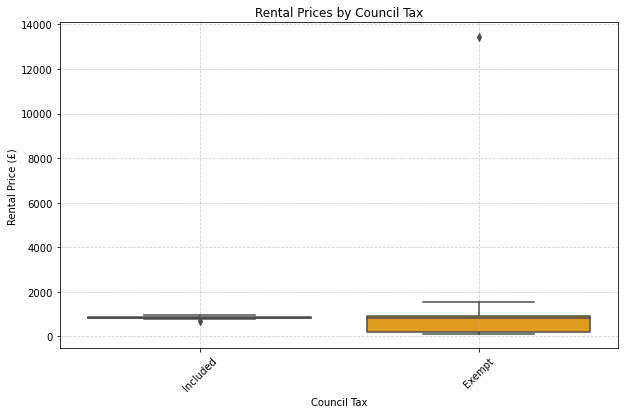

In [29]:
# Visualization 6: Rental Prices by Council Tax
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Council Tax', y='rent', color='orange')
plt.title('Rental Prices by Council Tax')
plt.xlabel('Council Tax')
plt.ylabel('Rental Price (£)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

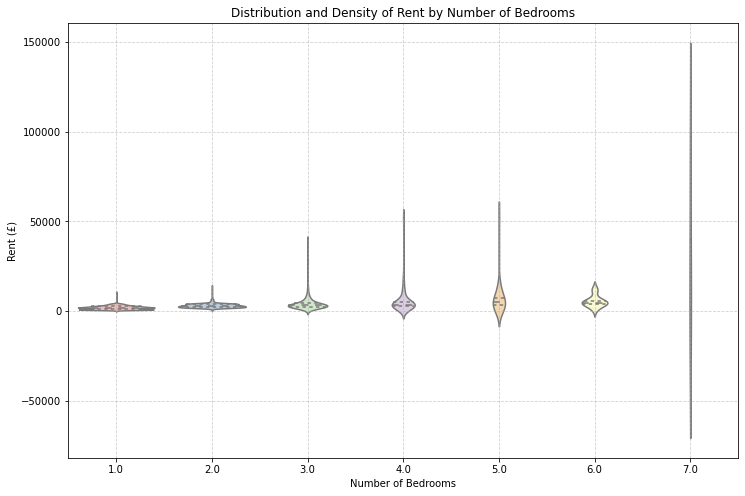

In [32]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='BEDROOMS', y='rent', palette='Pastel1', inner='quartile')
plt.title('Distribution and Density of Rent by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (£)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


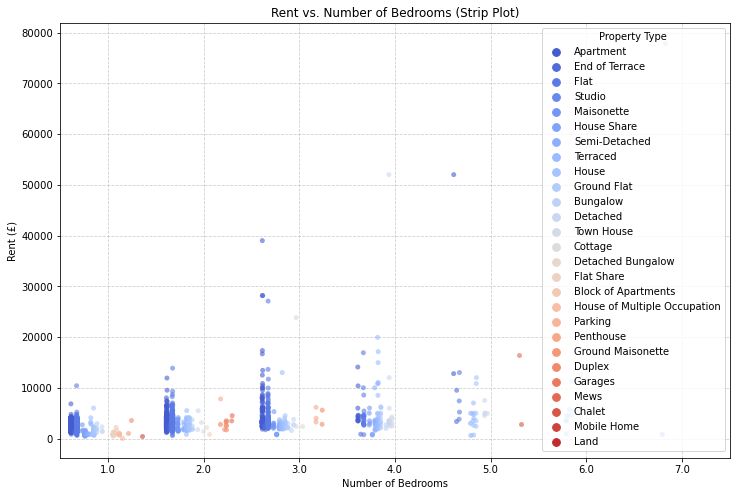

In [33]:
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x='BEDROOMS', y='rent', hue='PROPERTY TYPE', palette='coolwarm', jitter=True, dodge=True, alpha=0.6)
plt.title('Rent vs. Number of Bedrooms (Strip Plot)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (£)')
plt.legend(title='Property Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


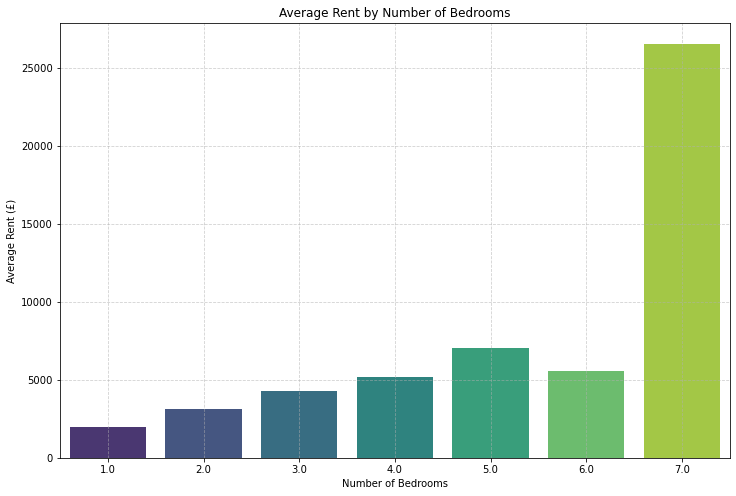

In [35]:
plt.figure(figsize=(12, 8))
avg_rent_by_bedrooms = df.groupby('BEDROOMS')['rent'].mean().reset_index()
sns.barplot(data=avg_rent_by_bedrooms, x='BEDROOMS', y='rent', palette='viridis')
plt.title('Average Rent by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent (£)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [44]:
# 3. Pie Chart: Distribution of rental properties by furnishing type
furnish_type_distribution = df['Furnish Type'].value_counts().reset_index()
furnish_type_distribution.columns = ['Furnish Type', 'Count']

pie_chart = px.pie(furnish_type_distribution, values='Count', names='Furnish Type', 
                   title='Distribution of Rental Properties by Furnishing Type')
pie_chart.show()




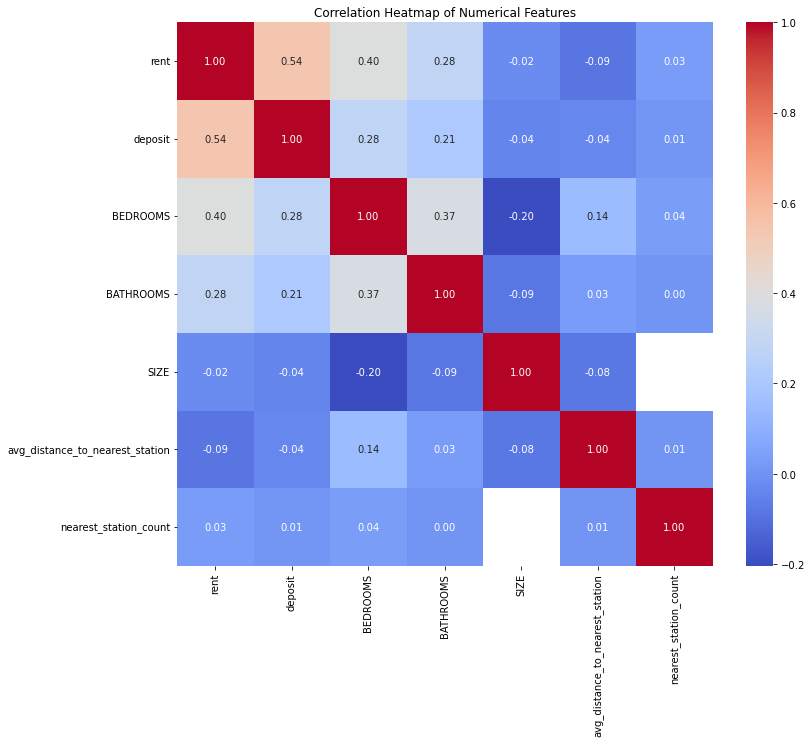

In [45]:
# 4. Heatmap: Correlation between numerical features excluding non-numeric columns
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()